# Prediksi Tingkat Kematangan Buah Pepaya

Cara pakai code:
1. Download dataset di https://www.kaggle.com/datasets/saurabhshahane/papaya-classification
2. Upload dataset ke drive kalian
3. Ubah path sesuai tempat kalian taruh datasetnya. ex: /content/drive/My Drive/Colab Notebooks/Dataset/Papaya
4. Didalam path, isinya ada folder mature, partiallymature, dan unmature
5. Kalo mau test prediksi, upload foto dibawah terus sesuaiin img_path sama nama fotonya. (Disaranin pake format jpg aja)

#Import Module

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import Nadam
import matplotlib.pyplot as plt
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Define the path of the Dataset

In [ ]:
base_dir = '/content/drive/My Drive/Colab Notebooks/Dataset/Papaya'

train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

#Organize the images into training, validation, and test sets

In [ ]:
from sklearn.model_selection import train_test_split

os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

test_size = 0.2

for class_name in ['mature', 'partiallymature', 'unmature']:
    source_folder = os.path.join(base_dir, class_name)
    image_files = os.listdir(source_folder)

    train_images, test_images = train_test_split(image_files, test_size=test_size, random_state=42, stratify=[class_name] * len(image_files))

    train_class_dir = os.path.join(train_dir, class_name)
    test_class_dir = os.path.join(test_dir, class_name)
    os.makedirs(train_class_dir, exist_ok=True)
    os.makedirs(test_class_dir, exist_ok=True)

    for img in train_images:
        source_path = os.path.join(source_folder, img)
        dest_path = os.path.join(train_class_dir, img)
        os.rename(source_path, dest_path)

    for img in test_images:
        source_path = os.path.join(source_folder, img)
        dest_path = os.path.join(test_class_dir, img)
        os.rename(source_path, dest_path)

#Create CNN Model

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(3, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

#Compile the Model

In [ ]:
model.compile(optimizer=Nadam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#Data augmentation and preprocessing

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

Found 240 images belonging to 3 classes.
Found 60 images belonging to 3 classes.


#Train the Model

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=20,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size
)

Epoch 1/20
7/7 [==============================] - 26s 3s/step - loss: 1.1678 - accuracy: 0.3990 - val_loss: 0.9317 - val_accuracy: 0.7188
Epoch 2/20
7/7 [==============================] - 19s 3s/step - loss: 0.9923 - accuracy: 0.5240 - val_loss: 0.7193 - val_accuracy: 0.7188
Epoch 3/20
7/7 [==============================] - 23s 3s/step - loss: 0.6954 - accuracy: 0.6971 - val_loss: 0.4233 - val_accuracy: 0.8750
Epoch 4/20
7/7 [==============================] - 23s 3s/step - loss: 0.5105 - accuracy: 0.7812 - val_loss: 0.2464 - val_accuracy: 0.9062
Epoch 5/20
7/7 [==============================] - 22s 3s/step - loss: 0.3771 - accuracy: 0.8462 - val_loss: 0.2899 - val_accuracy: 0.9375
Epoch 6/20
7/7 [==============================] - 19s 3s/step - loss: 0.3515 - accuracy: 0.8269 - val_loss: 0.2544 - val_accuracy: 0.8750
Epoch 7/20
7/7 [==============================] - 24s 3s/step - loss: 0.2586 - accuracy: 0.9018 - val_loss: 0.3270 - val_accuracy: 0.8750
Epoch 8/20
7/7 [==================

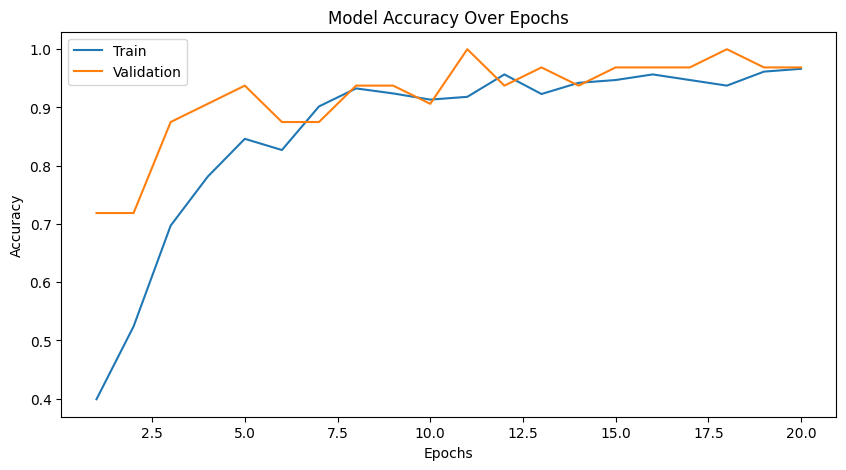

Training Accuracy on the Last Epoch: 0.9663
Validation Accuracy on the Last Epoch: 0.9688


In [ ]:
import matplotlib.pyplot as plt

train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

plt.figure(figsize=(10, 5))
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Train')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Validation')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

final_train_accuracy = train_accuracy[-1]
final_val_accuracy = val_accuracy[-1]

print(f"Training Accuracy on the Last Epoch: {final_train_accuracy:.4f}")
print(f"Validation Accuracy on the Last Epoch: {final_val_accuracy:.4f}")

#Evaluate the Model

Found 60 images belonging to 3 classes.
2/2 [==============================] - 4s 1s/step


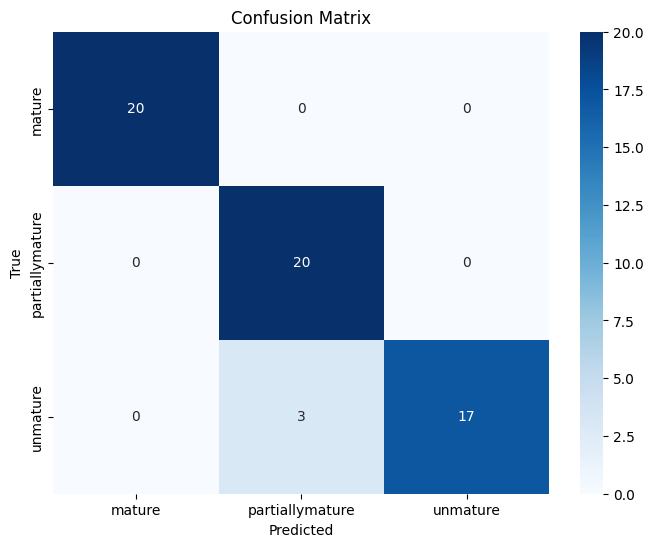

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

prediction_dir = '/content/drive/My Drive/Colab Notebooks/Dataset/Papaya/test'

class_names = ['mature', 'partiallymature', 'unmature']

prediction_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

prediction_generator = prediction_datagen.flow_from_directory(
    prediction_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode=None,
    shuffle=False
)

predictions = model.predict(prediction_generator)
predicted_classes = np.argmax(predictions, axis=1)

true_labels = []
for root, dirs, files in os.walk(prediction_dir):
    for dir in dirs:
        true_labels.extend([dir] * len(os.listdir(os.path.join(root, dir))))

confusion = confusion_matrix(true_labels, [class_names[i] for i in predicted_classes])

plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

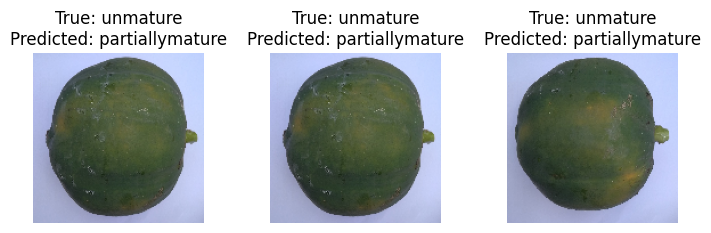

In [ ]:
misclassified_images = []

for i in range(len(true_labels)):
    if true_labels[i] != class_names[predicted_classes[i]]:
        image_path = prediction_generator.filepaths[i]
        image = load_img(image_path, target_size=(150, 150))
        misclassified_images.append((image, true_labels[i], class_names[predicted_classes[i]]))

plt.figure(figsize=(12, 8))
for i, (image, true_label, predicted_label) in enumerate(misclassified_images):
    plt.subplot(4, 5, i + 1)
    plt.imshow(image)
    plt.title(f'True: {true_label}\nPredicted: {predicted_label}')
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
report = classification_report(true_labels, [class_names[i] for i in predicted_classes])
print(report)

                 precision    recall  f1-score   support

         mature       1.00      1.00      1.00        20
partiallymature       0.87      1.00      0.93        20
       unmature       1.00      0.85      0.92        20

       accuracy                           0.95        60
      macro avg       0.96      0.95      0.95        60
   weighted avg       0.96      0.95      0.95        60

